
--- Shapiro-Wilk Test for Normality ---
Skipping Shapiro Test for Low-Carb at Baseline due to no variance.
Normality Test for Low-Carb at After 1 month: W=0.952246, p=0.695118
Normality Test for Low-Carb at After 2 months: W=0.975234, p=0.934685

Skipping Shapiro Test for Low-Fat at Baseline due to no variance.
Normality Test for Low-Fat at After 1 month: W=0.948084, p=0.645887
Normality Test for Low-Fat at After 2 months: W=0.934548, p=0.494084

Skipping Shapiro Test for Low-Carb at Baseline due to no variance.
Shapiro-Wilk Test for Low-Carb at After 1 month: W=0.952246, p=0.695118


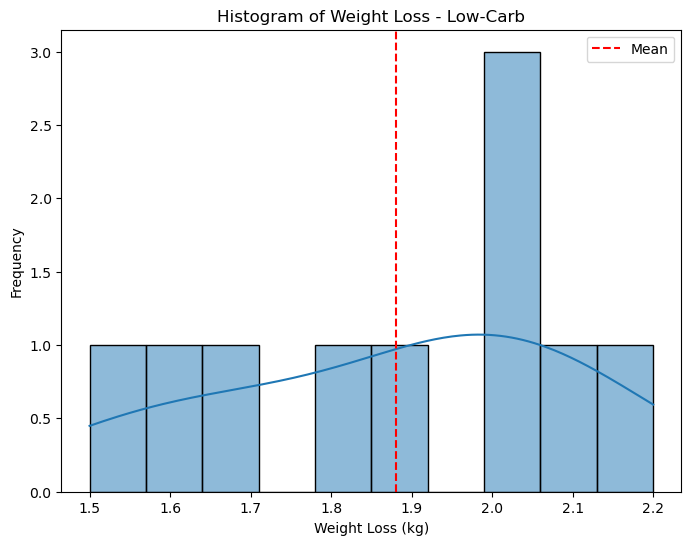

Shapiro-Wilk Test for Low-Carb at After 2 months: W=0.975234, p=0.934685


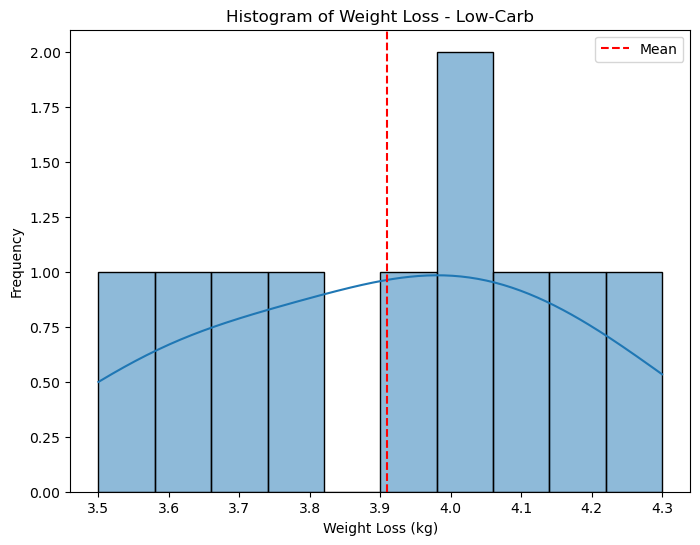

Skipping Shapiro Test for Low-Fat at Baseline due to no variance.
Shapiro-Wilk Test for Low-Fat at After 1 month: W=0.948084, p=0.645887


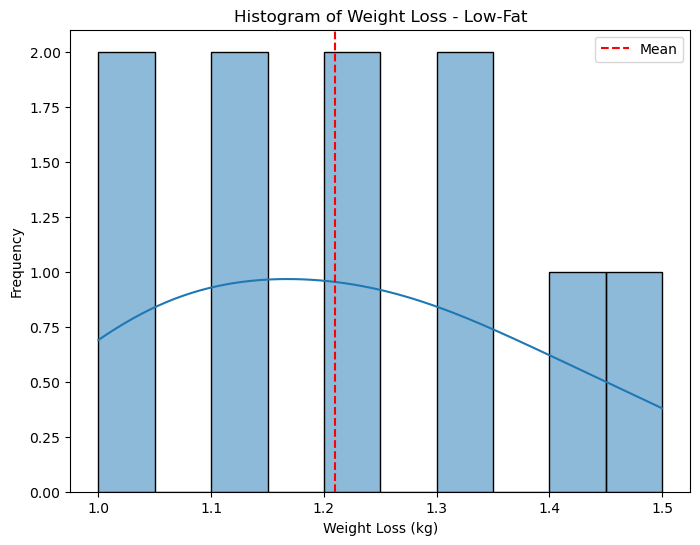

Shapiro-Wilk Test for Low-Fat at After 2 months: W=0.934548, p=0.494084


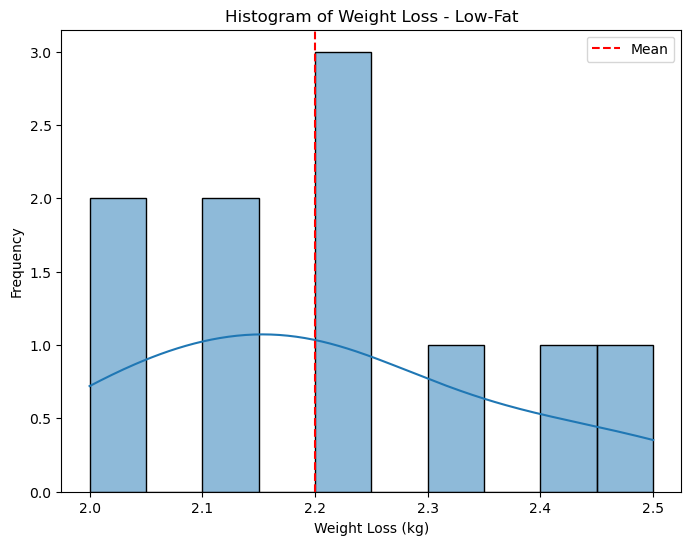


--- Levene’s Test for Homogeneity of Variance ---
Levene’s Test: W=127.851057, p=0.000000


--- Mauchly's Test for Sphericity ---
Mauchly’s W: 0.094299, p-value: 0.000000

--- Two-Way Mixed Model ANOVA Results ---
  Source         SS  DF         MS           F         p-unc       ng2  \
0   Time  93.334333   2  46.667167  221.512137  1.134267e-21  0.835182   
1  Error   8.005667  38   0.210675         NaN           NaN       NaN   

        eps  
0  0.524741  
1       NaN  

--- Post-hoc Tests (if necessary) ---
  Contrast               A               B  Paired  Parametric          T  \
0     Time   After 1 month  After 2 months    True        True -12.440914   
1     Time   After 1 month        Baseline    True        True  17.536628   
2     Time  After 2 months        Baseline    True        True  15.141360   

    dof alternative         p-unc       BF10    hedges  
0  19.0   two-sided  1.405194e-10  6.677e+07 -2.125791  
1  19.0   two-sided  3.423323e-13  1.894e+10  5.435392  
2

In [37]:
import pandas as pd
import pingouin as pg
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings


# Step 1: Load dataset
file_path = "C:\\Users\\User\\OneDrive\\Personal docs\\FRESHMAN\\4th yr - 1st Sem\\Applied Multivariate Data Analysis\\SA1_Samson\\Weight Loss by Diet Type and Time.csv"
df = pd.read_csv(file_path)

# Step 2: Reshape data to long format
df_long = pd.melt(df, id_vars=['Participant', 'Diet Type'], 
                  value_vars=['Baseline', 'After 1 month', 'After 2 months'],
                  var_name='Time', value_name='Weight_Loss')

# Step 3: Check Assumptions

# 3.1 Normality: Shapiro-Wilk Test for each group and time (skip if no variance)
print("\n--- Shapiro-Wilk Test for Normality ---")  # Title for this section
for group in df_long['Diet Type'].unique():
    for time in df_long['Time'].unique():
        subset = df_long[(df_long['Diet Type'] == group) & (df_long['Time'] == time)]['Weight_Loss']
        if subset.nunique() > 1:  # Only perform Shapiro if there's variance
            stat, p = stats.shapiro(subset)
            print(f'Normality Test for {group} at {time}: W={stat:.6f}, p={p:.6f}')
        else:
            print(f'Skipping Shapiro Test for {group} at {time} due to no variance.')
    print()  # Add a space between each group
    
# Create a function to plot histograms
def plot_histograms(df, diet_type):
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Weight_Loss'], bins=10, kde=True)
    plt.title(f'Histogram of Weight Loss - {diet_type}')
    plt.xlabel('Weight Loss (kg)')
    plt.ylabel('Frequency')
    plt.axvline(x=df['Weight_Loss'].mean(), color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.show()

 
# Perform Shapiro-Wilk test and plot histograms for each diet type and time point
for diet in df_long['Diet Type'].unique():
    for time in df_long['Time'].unique():
        subset = df_long[(df_long['Diet Type'] == diet) & (df_long['Time'] == time)]['Weight_Loss']
        if subset.nunique() > 1:  # Only perform Shapiro if there's variance
            # Shapiro-Wilk Test
            stat, p = stats.shapiro(subset)
            print(f'Shapiro-Wilk Test for {diet} at {time}: W={stat:.6f}, p={p:.6f}')
            
            # Plot histogram
            plot_histograms(df_long[(df_long['Diet Type'] == diet) & (df_long['Time'] == time)], diet)
        else:
            print(f'Skipping Shapiro Test for {diet} at {time} due to no variance.')

# Step 4: Levene’s Test for Homogeneity of Variance
print("\n--- Levene’s Test for Homogeneity of Variance ---")
stat, p = stats.levene(df_long[df_long['Time'] == 'Baseline']['Weight_Loss'],
                       df_long[df_long['Time'] == 'After 1 month']['Weight_Loss'],
                       df_long[df_long['Time'] == 'After 2 months']['Weight_Loss'])
print(f'Levene’s Test: W={stat:.6f}, p={p:.6f}\n')

# Step 5: Mauchly's Test for Sphericity
print("\n--- Mauchly's Test for Sphericity ---")
sphericity_test = pg.sphericity(df_long, dv='Weight_Loss', within='Time', subject='Participant')

# Extracting Mauchly's W and p-value directly from the SpherResults object
sphericity_w = sphericity_test.W  # Accessing Mauchly's W
p_value_sphericity = sphericity_test.pval  # Accessing the p-value

print(f'Mauchly’s W: {sphericity_w:.6f}, p-value: {p_value_sphericity:.6f}')

# Step 6: Perform Two-Way Mixed Model ANOVA
print("\n--- Two-Way Mixed Model ANOVA Results ---")
# Perform repeated measures ANOVA with correction if needed
aov = pg.rm_anova(
    dv='Weight_Loss',
    within='Time',
    subject='Participant',
    data=df_long,
    correction='greenhouse-geisser' if p_value_sphericity < 0.05 else None,
    detailed=True
)
print(aov)

# Step 7: Perform post-hoc tests if interaction is significant
print("\n--- Post-hoc Tests (if necessary) ---")
if aov.loc[aov['Source'] == 'Time', 'p-unc'].values[0] < 0.05:  # Check if Time effect is significant
    posthoc = pg.pairwise_tests(dv='Weight_Loss', within='Time', subject='Participant', data=df_long, parametric=True)
    print(posthoc)
else:
    print("No significant interaction detected, skipping post-hoc tests.")
    
    
# Optional: Suppress specific warnings
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)  # Suppress runtime warnings related to division by zero
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress all future warnings related to deprecations



In [34]:
# Step 5: Mauchly's Test for Sphericity
print("\n--- Mauchly's Test for Sphericity ---")
sphericity_test = pg.sphericity(df_long, dv='Weight_Loss', within='Time', subject='Participant')

# Extracting Mauchly's W and p-value directly from the SpherResults object
sphericity_w = sphericity_test.W  # Accessing Mauchly's W
p_value_sphericity = sphericity_test.pval  # Accessing the p-value

print(f'Mauchly’s W: {sphericity_w:.6f}, p-value: {p_value_sphericity:.6f}')

# Step 6: Perform Two-Way Mixed Model ANOVA
print("\n--- Two-Way Mixed Model ANOVA Results ---")
# Perform repeated measures ANOVA with correction if needed
aov = pg.rm_anova(
    dv='Weight_Loss',
    within='Time',
    subject='Participant',
    data=df_long,
    correction='greenhouse-geisser' if p_value_sphericity < 0.05 else None,
    detailed=True
)
print(aov)

# Step 7: Perform post-hoc tests if interaction is significant
print("\n--- Post-hoc Tests (if necessary) ---")
if aov.loc[aov['Source'] == 'Time', 'p-unc'].values[0] < 0.05:  # Check if Time effect is significant
    posthoc = pg.pairwise_tests(dv='Weight_Loss', within='Time', subject='Participant', data=df_long, parametric=True)
    print(posthoc)
else:
    print("No significant interaction detected, skipping post-hoc tests.")



--- Mauchly's Test for Sphericity ---
Mauchly’s W: 0.094299, p-value: 0.000000

--- Two-Way Mixed Model ANOVA Results ---
  Source         SS  DF         MS           F         p-unc       ng2  \
0   Time  93.334333   2  46.667167  221.512137  1.134267e-21  0.835182   
1  Error   8.005667  38   0.210675         NaN           NaN       NaN   

        eps  
0  0.524741  
1       NaN  

--- Post-hoc Tests (if necessary) ---
  Contrast               A               B  Paired  Parametric          T  \
0     Time   After 1 month  After 2 months    True        True -12.440914   
1     Time   After 1 month        Baseline    True        True  17.536628   
2     Time  After 2 months        Baseline    True        True  15.141360   

    dof alternative         p-unc       BF10    hedges  
0  19.0   two-sided  1.405194e-10  6.677e+07 -2.125791  
1  19.0   two-sided  3.423323e-13  1.894e+10  5.435392  
2  19.0   two-sided  4.666314e-12  1.625e+09  4.692990  
